# Segmentação de clientes para adequação de Campanhas de Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib import pylab
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn import metrics
from pyclustertend import hopkins

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Carregando os dados
data = pd.read_csv('dados_clientes.csv')

In [3]:
#Verificando as 5 primeiras linhas
data.head()

,IDCliente,Sexo,Idade,Salario_Mensal_Milhar,Pontuacao_Gasto
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Feminino,20,16,6
3,4,Feminino,23,16,77
4,5,Feminino,31,17,40


In [4]:
#Veriticando as dimensões
data.shape

(200, 5)

In [5]:
#Deletando a coluna IDCliente

data.drop('IDCliente', axis = 1, inplace= True)

In [6]:
#Verificando os tipos
data.dtypes

Sexo                     object
Idade                     int64
Salario_Mensal_Milhar     int64
Pontuacao_Gasto           int64
dtype: object

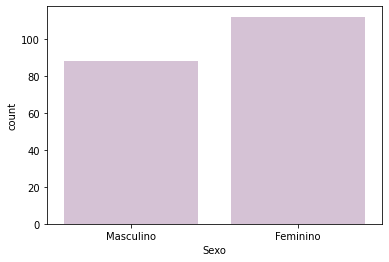

In [7]:
#Verificando a quantidade de clintes por sexo
sns.countplot(x= 'Sexo', color = 'thistle', data = data)

In [8]:
data['Sexo'].value_counts()

Feminino     112
Masculino     88
Name: Sexo, dtype: int64

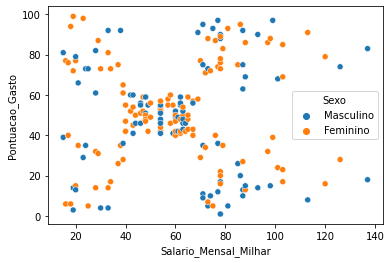

In [9]:
#Scatter plot
sns.scatterplot(data=data, x="Salario_Mensal_Milhar", y="Pontuacao_Gasto", hue="Sexo")

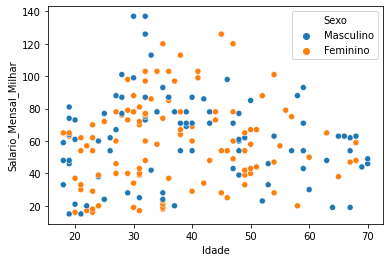

In [10]:
#Scatter plot
sns.scatterplot(data=data, x="Idade", y="Salario_Mensal_Milhar", hue="Sexo")

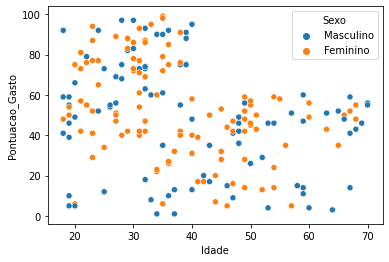

In [11]:
#Scatter plot
sns.scatterplot(data=data, x="Idade", y="Pontuacao_Gasto", hue="Sexo")

In [12]:
data.isnull().sum()

Sexo                     0
Idade                    0
Salario_Mensal_Milhar    0
Pontuacao_Gasto          0
dtype: int64

In [13]:
data['Sexo'].value_counts()

Feminino     112
Masculino     88
Name: Sexo, dtype: int64

In [14]:
data['Sexo'] = data['Sexo'].astype('category')

In [15]:
#Vamos mudar os valores de sexo para 1(masculino) e 0(feminino)
data['Sexo_quali'] =data['Sexo'].cat.codes




In [16]:
data['Sexo_quali'].value_counts()

0    112
1     88
Name: Sexo_quali, dtype: int64

In [17]:
#Vamos agora retirar a coluna Sexo
data.drop("Sexo", axis = 1, inplace= True)

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)   


In [19]:
hopkins(data_scaled,150)

0.25669051014369965

## Versão 1- K-means com Variável Sexo

In [20]:
# Determinando um range de K
k_range = range(1,15)

In [21]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(data_scaled) for k in k_range]

In [22]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [23]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(data_scaled, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [24]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [25]:
# Soma total dos quadrados
soma_total = sum(pdist(data_scaled)**2)/data_scaled.shape[0]

In [26]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

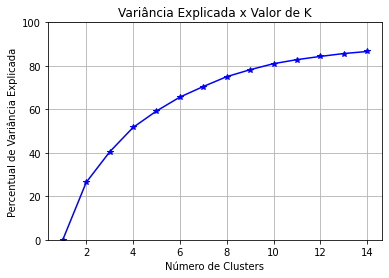

In [27]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [28]:
# Criando um modelo com K = 12
modelo_v1 = KMeans(n_clusters = 12)
modelo_v1.fit(data_scaled)

KMeans(n_clusters=12)

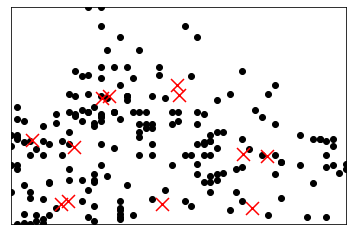

In [29]:
# Plot dos centróides

x_min, x_max = data_scaled[:, 0].min() , data_scaled[:, 0].max()
y_min, y_max = data_scaled[:, 1].min() , data_scaled[:, 1].max()
plt.plot(data_scaled[:, 0], data_scaled[:, 1], 'k.', markersize = 12)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [30]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(data_scaled, labels, metric = 'euclidean')

0.43084942348494937

## Versão 1- K-means sem Variável Sexo

In [31]:
#Vamos retirar a coluna sexo
data2 = data.drop('Sexo_quali', axis = 1)

In [32]:
scaler = StandardScaler()
data2 = scaler.fit_transform(data2)

In [33]:
# Determinando um range de K
k_range = range(1,15)

In [34]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(data2) for k in k_range]

In [35]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [36]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(data2, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [37]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [38]:
# Soma total dos quadrados
soma_total = sum(pdist(data2)**2)/data2.shape[0]

In [39]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

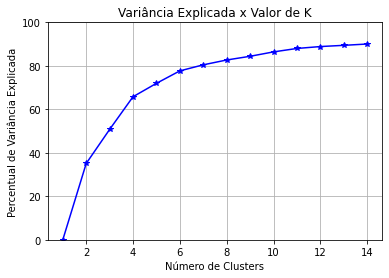

In [40]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [41]:
# Criando um modelo com K = 8
n_clusters = 10


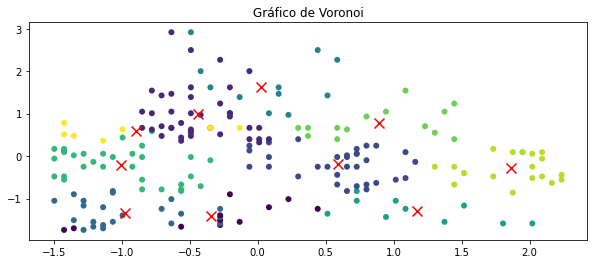

In [42]:

pylab.rcParams['figure.figsize'] = (10.0, 4.0)

    
# Criando o classificador e construindo o modelo
modelo = KMeans(n_clusters , random_state = 101)
y_pred = modelo.fit_predict(data2)
    

plt.title("Gráfico de Voronoi")
plt.scatter(data2[:, 0], data2[:, 1], c = y_pred, edgecolors = 'none')
plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

In [43]:
# Silhouette Score
labels = modelo.labels_
silhouette_score(data2, labels, metric = 'euclidean')

0.4244290879355532

## Versão 2- K-means com Variável Sexo

In [44]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [45]:
# Determinando um range de K
k_range = range(1,15)

In [46]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(data_scaled) for k in k_range]

In [47]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [48]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(data_scaled, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [49]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [50]:
# Soma total dos quadrados
soma_total = sum(pdist(data_scaled)**2)/data_scaled.shape[0]

In [51]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

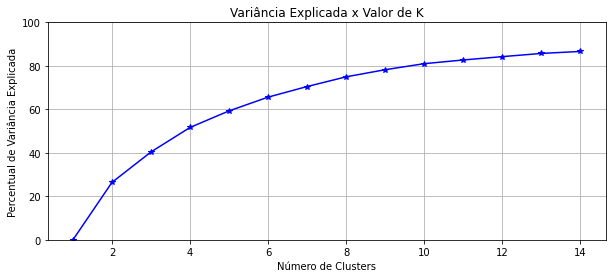

In [52]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [53]:
# Criando um modelo com K = 8
n_clusters = 12

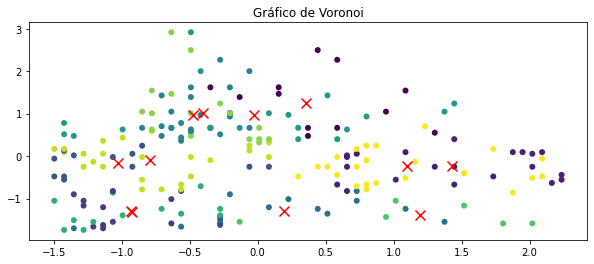

In [54]:

pylab.rcParams['figure.figsize'] = (10.0, 4.0)

    
# Criando o classificador e construindo o modelo
modelo = KMeans(n_clusters , random_state = 101)
y_pred = modelo.fit_predict(data_scaled)
    

plt.title("Gráfico de Voronoi")
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c = y_pred, edgecolors = 'none')
plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

In [55]:
# Silhouette Score
labels = modelo.labels_
silhouette_score(data_scaled, labels, metric = 'euclidean')

0.42415565448077674

In [56]:
# Lista com nomes das colunas
names = ['Idade','Salario_Mensal_Milhar','Pontuacao_Gasto','Sexo_quali']

In [57]:
# Cria o cluster map
cluster_map = pd.DataFrame(data, columns = names)

cluster_map['Pontuacao_Gasto'] = pd.to_numeric(cluster_map['Pontuacao_Gasto'])
cluster_map['cluster'] = modelo.labels_

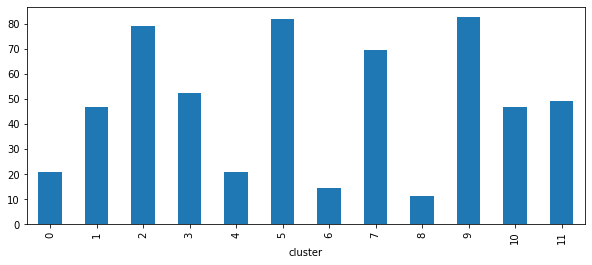

In [58]:
# Calcula a média de consumo de energia por cluster
cluster_map.groupby('cluster')['Pontuacao_Gasto'].mean().plot.bar()

## Modelo 3 - DBSCAN

In [64]:
# Construção do modelo
modelo = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean')

In [66]:
# Fit do modelo
X = data_scaled
y_db = modelo.fit(X)

In [67]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 12
Silhouette Coefficient: 0.424


In [68]:
y_db.labels_

array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,  2,  3,  3,  3,  2,
       -1,  3,  4,  2,  4,  2,  4,  3,  4,  4, -1, -1,  2,  4, -1,  2, -1,
       -1,  3,  4,  2, -1,  2,  4,  5,  2, -1,  3,  2,  4, -1,  4,  2,  3,
        4,  2,  3, -1,  2, -1,  5,  4, -1,  3,  5,  2,  3,  4,  5,  3,  2,
        6,  5,  4,  3, -1,  4,  6,  6,  6,  3, -1,  5,  3,  3, -1,  2,  2,
        2,  5, -1, -1,  8, -1,  7, -1,  8, -1, -1, -1, -1,  3,  7, -1,  7,
       -1, -1, -1,  7, -1,  8, -1,  7, -1, -1, -1,  7, -1,  8, -1,  8, -1,
        7, -1,  7, -1,  7, -1,  7, -1,  7, -1,  7, -1,  7, -1,  7, -1, -1,
       -1, -1, -1,  8, -1,  7, -1, -1, -1, -1, -1,  7, -1,  7, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

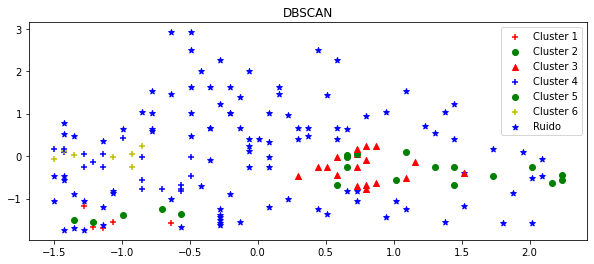

In [70]:
# Plot
for i in range(0, X.shape[0]):
    if y_db.labels_[i] == 0:
        c1 = plt.scatter(X[i,0], X[i,1], c = 'r', marker = '+')
    elif y_db.labels_[i] == 1:
        c2 = plt.scatter(X[i,0], X[i,1], c = 'g', marker = 'o')
    elif y_db.labels_[i] == 2:
        c3 = plt.scatter(X[i,0], X[i,1], c = 'r', marker = '^') 
    elif y_db.labels_[i] == 3:
        c4 = plt.scatter(X[i,0], X[i,1], c = 'b', marker = '+') 
    elif y_db.labels_[i] == 4:
        c5 = plt.scatter(X[i,0], X[i,1], c = 'g', marker = 'o') 
    elif y_db.labels_[i] == 5:
        c6 = plt.scatter(X[i,0], X[i,1], c = 'y', marker = '+')     
    elif y_db.labels_[i] == 6:
        c7 = plt.scatter(X[i,0], X[i,1], c = 'b', marker = '*')
    elif y_db.labels_[i] == 7:
        c8 = plt.scatter(X[i,0], X[i,1], c = 'b', marker = '*')
    elif y_db.labels_[i] == 8:
        c8 = plt.scatter(X[i,0], X[i,1], c = 'b', marker = '*')
    elif y_db.labels_[i] == -1:
        c7 = plt.scatter(X[i,0], X[i,1], c = 'b', marker = '*')
    
plt.legend([c1, c2,c3,c4,c5,c6, c7], ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4',
                                      'Cluster 5', 'Cluster 6','Ruido'])
plt.title('DBSCAN')
plt.show()